# Visualisation des ventes - Mini TP Data Warehouse

Ce notebook présente les visualisations finales du mini-TP Data Warehouse. À partir des données agrégées générées par le pipeline ETL (`sales_by_month.csv`, `top_10_products.csv`, `weekly_sales_view.csv`), nous analysons les tendances de ventes mensuelles, les produits les plus performants, et l’évolution hebdomadaire du chiffre d’affaires.

Les graphiques permettent de valider la qualité des données et d’identifier des insights commerciaux utiles.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

monthly = pd.read_csv("../data/sales_by_month.csv")
top10 = pd.read_csv("../data/top_10_products.csv")
weekly = pd.read_csv("../data/weekly_sales_view.csv")


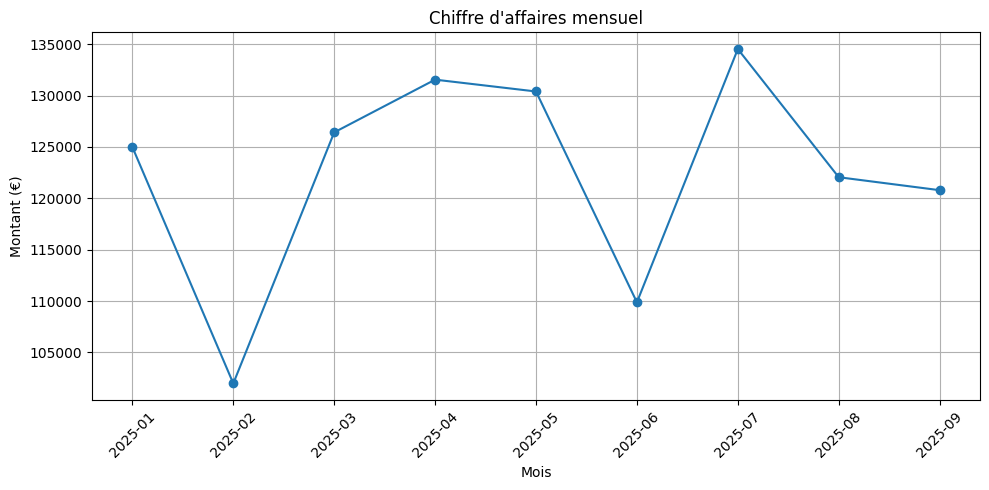

In [2]:
monthly["label"] = monthly["year"].astype(str) + "-" + monthly["month"].astype(str).str.zfill(2)

plt.figure(figsize=(10,5))
plt.plot(monthly["label"], monthly["amount"], marker="o")
plt.title("Chiffre d'affaires mensuel")
plt.xlabel("Mois")
plt.ylabel("Montant (€)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig("../data/monthly_sales.png", dpi=150)
plt.show()


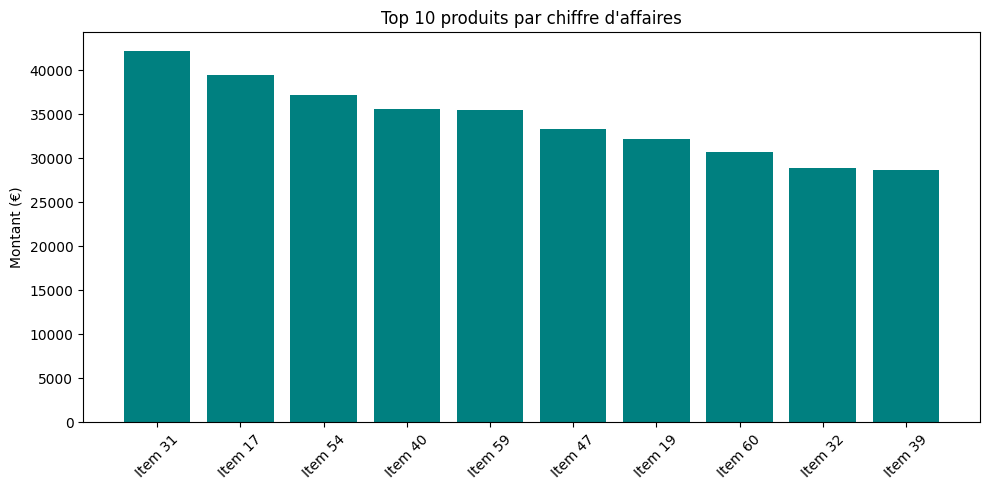

In [3]:
plt.figure(figsize=(10,5))
plt.bar(top10["product_name"], top10["amount"], color="teal")
plt.title("Top 10 produits par chiffre d'affaires")
plt.ylabel("Montant (€)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("../data/top_10_products.png", dpi=150)
plt.show()


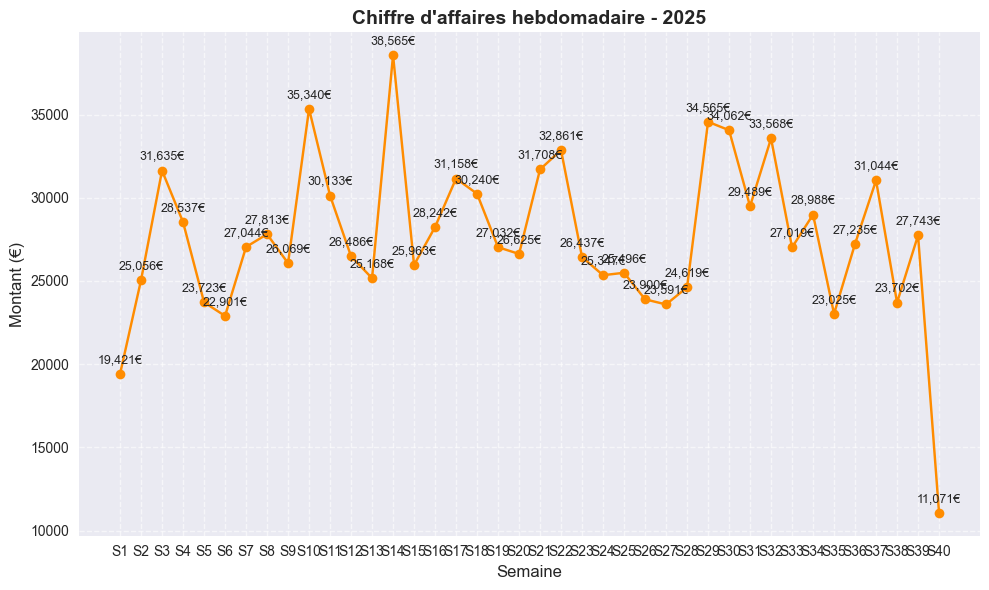

In [4]:
plt.style.use('seaborn-v0_8')
fig, ax = plt.subplots(figsize=(10, 6))

x = weekly["week"]
y = weekly["amount"]

ax.plot(x, y, marker='o', linestyle='-', color='darkorange')
ax.set_title("Chiffre d'affaires hebdomadaire - 2025", fontsize=14, weight='bold')
ax.set_xlabel("Semaine", fontsize=12)
ax.set_ylabel("Montant (€)", fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels([f"S{w}" for w in x])
ax.grid(True, linestyle='--', alpha=0.6)

for i, val in enumerate(y):
    ax.annotate(f'{val:,.0f}€', (x[i], y[i]), textcoords="offset points", xytext=(0, 8), ha='center', fontsize=9)

plt.tight_layout()
plt.savefig("../data/weekly_sales_line.png", dpi=150)
plt.show()


## Conclusion

Les visualisations confirment la cohérence du pipeline ETL et la pertinence du schéma en étoile mis en place. On observe :

- Une saisonnalité dans les ventes mensuelles
- Une concentration du chiffre d’affaires sur quelques produits phares
- Une dynamique hebdomadaire régulière avec des pics identifiables

Ces résultats peuvent servir de base à des décisions marketing, logistiques ou stratégiques. Le mini-TP est ainsi bouclé avec une chaîne complète : du RAW à l’analyse visuelle.
